# Capstone report

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Prepare Dataset

Merge table 11 and table 12

In [2]:
# read table 11 and 12
tb11 = pd.read_csv('table_11.csv', index_col=None)
tb12 = pd.read_csv('table_12.csv', index_col=None)

In [3]:
# merge table 11 and 12 by County ID
ntb11 = tb11.drop(tb11.columns[1:9], axis=1)
tb = pd.merge(tb12, ntb11, how='inner', on='cty')

In [4]:
tb.to_csv('table_11-12.csv', index=False)

In [5]:
tb.columns

Index(['cty', 'county_name', 'cty_pop2000', 'cz', 'cz_name', 'cz_pop2000',
       'statename', 'state_id', 'stateabbrv', 'intersects_msa', 'cur_smoke_q1',
       'cur_smoke_q2', 'cur_smoke_q3', 'cur_smoke_q4', 'bmi_obese_q1',
       'bmi_obese_q2', 'bmi_obese_q3', 'bmi_obese_q4', 'exercise_any_q1',
       'exercise_any_q2', 'exercise_any_q3', 'exercise_any_q4',
       'puninsured2010', 'reimb_penroll_adj10', 'mort_30day_hosp_z',
       'adjmortmeas_amiall30day', 'adjmortmeas_chfall30day',
       'adjmortmeas_pnall30day', 'med_prev_qual_z', 'primcarevis_10',
       'diab_hemotest_10', 'diab_eyeexam_10', 'diab_lipids_10', 'mammogram_10',
       'amb_disch_per1000_10', 'cs00_seg_inc', 'cs00_seg_inc_pov25',
       'cs00_seg_inc_aff75', 'cs_race_theil_2000', 'gini99', 'poor_share',
       'inc_share_1perc', 'frac_middleclass', 'scap_ski90pcm', 'rel_tot',
       'cs_frac_black', 'cs_frac_hisp', 'unemp_rate', 'pop_d_2000_1980',
       'lf_d_2000_1980', 'cs_labforce', 'cs_elf_ind_man', 'cs_bor

In [6]:
len(tb)

1073

In [7]:
tb.head(5)

,cty,county_name,cty_pop2000,cz,cz_name,cz_pop2000,statename,state_id,stateabbrv,intersects_msa,...,le_raceadj_q3_M,le_raceadj_q4_M,count_q1_F,count_q2_F,count_q3_F,count_q4_F,count_q1_M,count_q2_M,count_q3_M,count_q4_M
0,1003,Baldwin,140415,11001,Mobile,599405.0,Alabama,1,AL,1,...,82.27977,84.75025,122351,110023,106440,98805,101194,103246,103219,92921
1,1005,Barbour,29038,10301,Eufaula,61458.0,Alabama,1,AL,0,...,81.05935,83.79749,23577,13590,9782,7385,18759,14378,9766,6408
2,1009,Blount,51024,10700,Birmingham,1038182.0,Alabama,1,AL,1,...,82.30053,84.16502,27874,28046,25802,12904,26117,30097,25761,11371
3,1015,Calhoun,112249,9600,LaGrange,457299.0,Alabama,1,AL,1,...,82.66959,83.28709,92985,81511,75250,42735,78701,84552,74572,39127
4,1025,Clarke,27867,11001,Mobile,599405.0,Alabama,1,AL,1,...,83.20515,86.08119,23842,13812,14173,9947,17262,16024,16179,9419


In [8]:
# Get average values of life expectancy
count_M = tb.count_q1_M + tb.count_q2_M + tb.count_q3_M + tb.count_q4_M
count_F = tb.count_q1_F + tb.count_q2_F + tb.count_q3_F + tb.count_q4_F
leall_M = (tb.le_raceadj_q1_M * tb.count_q1_M 
        + tb.le_raceadj_q2_M * tb.count_q2_M 
        + tb.le_raceadj_q3_M * tb.count_q3_M 
        + tb.le_raceadj_q4_M * tb.count_q4_M)
leall_F = (tb.le_raceadj_q1_F * tb.count_q1_F 
        + tb.le_raceadj_q2_F * tb.count_q2_F 
        + tb.le_raceadj_q3_F * tb.count_q3_F 
        + tb.le_raceadj_q4_F * tb.count_q4_F)
tb['le'] = (leall_M + leall_F) / (count_M + count_F)

In [9]:
# Get average values of Fraction Current Smokers, Fraction Obese, Fraction Exercised in Past 30 Days
tb['cur_smoke'] = (tb.cur_smoke_q1 * (tb.count_q1_M + tb.count_q1_F)
                 + tb.cur_smoke_q2 * (tb.count_q2_M + tb.count_q2_F)
                 + tb.cur_smoke_q3 * (tb.count_q3_M + tb.count_q3_F)
                 + tb.cur_smoke_q4 * (tb.count_q4_M + tb.count_q4_F)) / (count_M + count_F)
tb['bmi_obese'] = (tb.bmi_obese_q1 * (tb.count_q1_M + tb.count_q1_F)
                 + tb.bmi_obese_q2 * (tb.count_q2_M + tb.count_q2_F)
                 + tb.bmi_obese_q3 * (tb.count_q3_M + tb.count_q3_F)
                 + tb.bmi_obese_q4 * (tb.count_q4_M + tb.count_q4_F)) / (count_M + count_F)
tb['exercise_any'] = (tb.exercise_any_q1 * (tb.count_q1_M + tb.count_q1_F)
                    + tb.exercise_any_q2 * (tb.count_q1_M + tb.count_q2_F)
                    + tb.exercise_any_q3 * (tb.count_q1_M + tb.count_q3_F)
                    + tb.exercise_any_q4 * (tb.count_q1_M + tb.count_q4_F)) / (count_M + count_F)

In [10]:
tb.head(5)

,cty,county_name,cty_pop2000,cz,cz_name,cz_pop2000,statename,state_id,stateabbrv,intersects_msa,...,count_q3_F,count_q4_F,count_q1_M,count_q2_M,count_q3_M,count_q4_M,le,cur_smoke,bmi_obese,exercise_any
0,1003,Baldwin,140415,11001,Mobile,599405.0,Alabama,1,AL,1,...,106440,98805,101194,103246,103219,92921,83.435263,0.213284,0.225655,0.755309
1,1005,Barbour,29038,10301,Eufaula,61458.0,Alabama,1,AL,0,...,9782,7385,18759,14378,9766,6408,82.808376,0.209904,0.414177,0.832608
2,1009,Blount,51024,10700,Birmingham,1038182.0,Alabama,1,AL,1,...,25802,12904,26117,30097,25761,11371,82.485203,0.286449,0.373935,0.645049
3,1015,Calhoun,112249,9600,LaGrange,457299.0,Alabama,1,AL,1,...,75250,42735,78701,84552,74572,39127,81.344830,0.229967,0.286169,0.765085
4,1025,Clarke,27867,11001,Mobile,599405.0,Alabama,1,AL,1,...,14173,9947,17262,16024,16179,9419,83.042996,0.073055,0.417975,0.698628


In [11]:
tb.columns

Index(['cty', 'county_name', 'cty_pop2000', 'cz', 'cz_name', 'cz_pop2000',
       'statename', 'state_id', 'stateabbrv', 'intersects_msa', 'cur_smoke_q1',
       'cur_smoke_q2', 'cur_smoke_q3', 'cur_smoke_q4', 'bmi_obese_q1',
       'bmi_obese_q2', 'bmi_obese_q3', 'bmi_obese_q4', 'exercise_any_q1',
       'exercise_any_q2', 'exercise_any_q3', 'exercise_any_q4',
       'puninsured2010', 'reimb_penroll_adj10', 'mort_30day_hosp_z',
       'adjmortmeas_amiall30day', 'adjmortmeas_chfall30day',
       'adjmortmeas_pnall30day', 'med_prev_qual_z', 'primcarevis_10',
       'diab_hemotest_10', 'diab_eyeexam_10', 'diab_lipids_10', 'mammogram_10',
       'amb_disch_per1000_10', 'cs00_seg_inc', 'cs00_seg_inc_pov25',
       'cs00_seg_inc_aff75', 'cs_race_theil_2000', 'gini99', 'poor_share',
       'inc_share_1perc', 'frac_middleclass', 'scap_ski90pcm', 'rel_tot',
       'cs_frac_black', 'cs_frac_hisp', 'unemp_rate', 'pop_d_2000_1980',
       'lf_d_2000_1980', 'cs_labforce', 'cs_elf_ind_man', 'cs_bor

## In-depth analysis using machine learning

In [12]:
X_1 = tb[['cty_pop2000', 'intersects_msa']]
X_2 = tb.loc[:, 'cur_smoke':'exercise_any']
X_3 = tb.loc[:, 'puninsured2010':'tax_st_diff_top20']
X = pd.concat([X_1, X_2, X_3], axis = 1)
y = tb['le']

In [13]:
len(X.columns)

53

In [14]:
X.columns.values

array(['cty_pop2000', 'intersects_msa', 'cur_smoke', 'bmi_obese',
       'exercise_any', 'puninsured2010', 'reimb_penroll_adj10',
       'mort_30day_hosp_z', 'adjmortmeas_amiall30day',
       'adjmortmeas_chfall30day', 'adjmortmeas_pnall30day',
       'med_prev_qual_z', 'primcarevis_10', 'diab_hemotest_10',
       'diab_eyeexam_10', 'diab_lipids_10', 'mammogram_10',
       'amb_disch_per1000_10', 'cs00_seg_inc', 'cs00_seg_inc_pov25',
       'cs00_seg_inc_aff75', 'cs_race_theil_2000', 'gini99', 'poor_share',
       'inc_share_1perc', 'frac_middleclass', 'scap_ski90pcm', 'rel_tot',
       'cs_frac_black', 'cs_frac_hisp', 'unemp_rate', 'pop_d_2000_1980',
       'lf_d_2000_1980', 'cs_labforce', 'cs_elf_ind_man',
       'cs_born_foreign', 'mig_inflow', 'mig_outflow', 'pop_density',
       'frac_traveltime_lt15', 'hhinc00', 'median_house_value',
       'ccd_exp_tot', 'ccd_pup_tch_ratio', 'score_r', 'dropout_r',
       'cs_educ_ba', 'e_rank_b', 'cs_fam_wkidsinglemom', 'crime_total',
       's

### 1. Linear Regression

In [15]:
# Fitting Linear Regression using sklearn
from sklearn.linear_model import LinearRegression

#### 1) Use all 53 features to fit linear regression model

In [16]:
X0 = X.copy()

In [17]:
# Creates a LinearRegression object
lm = LinearRegression()
lm.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', lm.score(X0,y))

Coefficient of determination R^2 of the prediction: 0.824921447464


#### Estimated intercept and coefficients

In [18]:
print('Estimated intercept:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
pd.DataFrame(list(zip(X0.columns, lm.coef_)), columns = ['features', 'Coefficients'])

Estimated intercept: 1654357.80006
Number of coefficients: 53


,features,Coefficients
0,cty_pop2000,-4.496111e-08
1,intersects_msa,2.158680e-02
2,cur_smoke,-2.847131e+00
3,bmi_obese,-3.373241e-01
4,exercise_any,-4.314171e-01
5,puninsured2010,-1.321207e-02
6,reimb_penroll_adj10,-1.481957e-04
7,mort_30day_hosp_z,-8.012415e+03
8,adjmortmeas_amiall30day,1.381965e+05
9,adjmortmeas_chfall30day,1.874960e+05


We can see that some features have much higher coefficients: 
mort_30day_hosp_z, adjmortmeas_amiall30day, adjmortmeas_chfall30day, adjmortmeas_pnall30day, med_prev_qual_z, primcarevis_10, diab_hemotest_10, diab_eyeexam_10, diab_lipids_10, mammogram_10, amb_disch_per1000_10 

#### Predict Life Expectancy

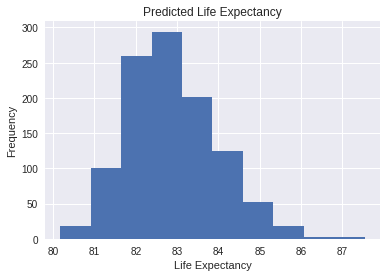

In [19]:
# Plot a histogram of all the predicted life expectancy
plt.hist(lm.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

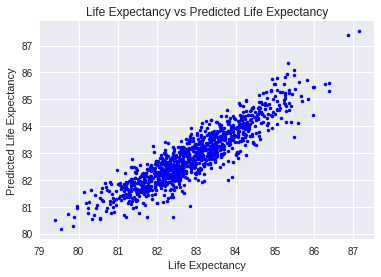

In [20]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, lm.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

#### Mean squared error (MSE)

In [22]:
print(np.mean((y - lm.predict(X0)) ** 2))

0.24692615513389088


#### 2) Feature selection with Principal Component Analysis

In [23]:
# Import library
from sklearn.decomposition import PCA

In [27]:
# Use Minka’s MLE to guess the dimension
# feature extraction
pca = PCA(n_components='mle', svd_solver='full')
X1 = pca.fit_transform(X) 
# summarize components
print('Number of Components', pca.n_components_)
#print('Explained Variance: %s', pca.explained_variance_ratio_)
#print('Explained Variance Ratio: %s', pca.explained_variance_ratio_ )

Number of Components 52


In [28]:
lm1 = LinearRegression()
lm1.fit(X1, y)
print('Coefficient of determination R^2 of the prediction:', lm1.score(X1,y))

Coefficient of determination R^2 of the prediction: 0.82487049722


In [29]:
# feature extraction with n_components=20
pca = PCA(n_components=20)
X2 = pca.fit_transform(X) 
# summarize components
print('Number of Components', pca.n_components_)
print('Explained Variance: %s', pca.explained_variance_ratio_)
print('Explained Variance Ratio: %s', pca.explained_variance_ratio_ )

Number of Components 20
Explained Variance: %s [  9.79898419e-01   1.98782977e-02   1.87715000e-04   1.66012728e-05
   1.16316504e-05   7.32588468e-06   2.68695147e-09   2.08324643e-09
   1.48989774e-09   1.09248413e-09   6.40010420e-10   3.83241193e-10
   2.79271735e-10   2.72018937e-10   1.97779226e-10   1.26726757e-10
   1.17170142e-10   9.77906572e-11   7.55064371e-11   4.41682530e-11]
Explained Variance Ratio: %s [  9.79898419e-01   1.98782977e-02   1.87715000e-04   1.66012728e-05
   1.16316504e-05   7.32588468e-06   2.68695147e-09   2.08324643e-09
   1.48989774e-09   1.09248413e-09   6.40010420e-10   3.83241193e-10
   2.79271735e-10   2.72018937e-10   1.97779226e-10   1.26726757e-10
   1.17170142e-10   9.77906572e-11   7.55064371e-11   4.41682530e-11]


In [30]:
lm2 = LinearRegression()
lm2.fit(X2, y)
print('Coefficient of determination R^2 of the prediction:', lm2.score(X2,y))

Coefficient of determination R^2 of the prediction: 0.7643029101


In [31]:
# feature extraction with n_components=10
pca = PCA(n_components=10)
X3 = pca.fit_transform(X) 
# summarize components
print('Number of Components', pca.n_components_)
print('Explained Variance: %s', pca.explained_variance_ratio_)
print('Explained Variance Ratio: %s', pca.explained_variance_ratio_ )

Number of Components 10
Explained Variance: %s [  9.79898419e-01   1.98782977e-02   1.87715000e-04   1.66012728e-05
   1.16316504e-05   7.32588468e-06   2.68695147e-09   2.08324643e-09
   1.48989774e-09   1.09248413e-09]
Explained Variance Ratio: %s [  9.79898419e-01   1.98782977e-02   1.87715000e-04   1.66012728e-05
   1.16316504e-05   7.32588468e-06   2.68695147e-09   2.08324643e-09
   1.48989774e-09   1.09248413e-09]


In [32]:
lm3 = LinearRegression()
lm3.fit(X3, y)
print('Coefficient of determination R^2 of the prediction:', lm3.score(X3,y))

Coefficient of determination R^2 of the prediction: 0.694371687226


In [33]:
# feature extraction with n_components=5
pca = PCA(n_components=5)
X4 = pca.fit_transform(X) 
# summarize components
print('Number of Components', pca.n_components_)
print('Explained Variance: %s', pca.explained_variance_ratio_)
print('Explained Variance Ratio: %s', pca.explained_variance_ratio_ )

Number of Components 5
Explained Variance: %s [  9.79898419e-01   1.98782977e-02   1.87715000e-04   1.66012728e-05
   1.16316504e-05]
Explained Variance Ratio: %s [  9.79898419e-01   1.98782977e-02   1.87715000e-04   1.66012728e-05
   1.16316504e-05]


In [34]:
lm4 = LinearRegression()
lm4.fit(X4, y)
print('Coefficient of determination R^2 of the prediction:', lm4.score(X4,y))

Coefficient of determination R^2 of the prediction: 0.553624200036


#### Estimated intercept and coefficients

In [35]:
# Use Minka’s MLE to guess the dimension as 52
print('Estimated intercept:', lm1.intercept_)
print('Number of coefficients:', len(lm1.coef_))
pd.DataFrame(list(zip(lm1.coef_)), columns = ['Coefficients'])

Estimated intercept: 82.8816835278
Number of coefficients: 52


,Coefficients
0,4.461694e-07
1,1.629156e-05
2,-4.190767e-05
3,-3.121870e-04
4,4.343405e-05
5,-8.389818e-05
6,-4.367967e-03
7,-1.338176e-02
8,-8.022278e-03
9,-3.475821e-02


In [36]:
# PCA with n_components=20
print('Estimated intercept:', lm2.intercept_)
print('Number of coefficients:', len(lm2.coef_))
pd.DataFrame(list(zip(lm2.coef_)), columns = ['Coefficients'])

Estimated intercept: 82.8816835278
Number of coefficients: 20


,Coefficients
0,4.461694e-07
1,1.629156e-05
2,-4.190767e-05
3,-3.121870e-04
4,4.343405e-05
5,-8.389818e-05
6,-4.367967e-03
7,-1.338176e-02
8,-8.022278e-03
9,-3.475821e-02


In [37]:
# PCA with n_components=10
print('Estimated intercept:', lm3.intercept_)
print('Number of coefficients:', len(lm3.coef_))
pd.DataFrame(list(zip(lm3.coef_)), columns = ['Coefficients'])

Estimated intercept: 82.8816835278
Number of coefficients: 10


,Coefficients
0,4.461694e-07
1,1.629156e-05
2,-4.190767e-05
3,-3.121870e-04
4,4.343405e-05
5,-8.389818e-05
6,-4.367967e-03
7,-1.338176e-02
8,-8.022278e-03
9,-3.475821e-02


In [38]:
# PCA with n_components=5
print('Estimated intercept:', lm4.intercept_)
print('Number of coefficients:', len(lm4.coef_))
pd.DataFrame(list(zip(lm4.coef_)), columns = ['Coefficients'])

Estimated intercept: 82.8816835278
Number of coefficients: 5


,Coefficients
0,4.461694e-07
1,1.629156e-05
2,-4.190767e-05
3,-3.121870e-04
4,4.343405e-05


#### Predict Life Expectancy

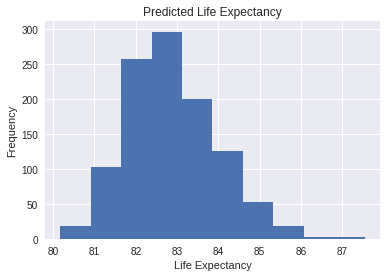

In [39]:
# Plot a histogram of all the predicted life expectancy
plt.hist(lm1.predict(X1))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

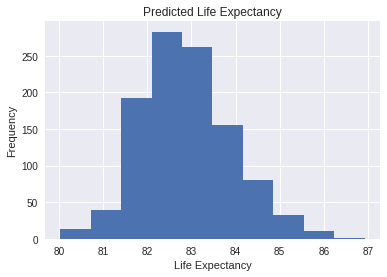

In [41]:
# Plot a histogram of all the predicted life expectancy
plt.hist(lm2.predict(X2))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

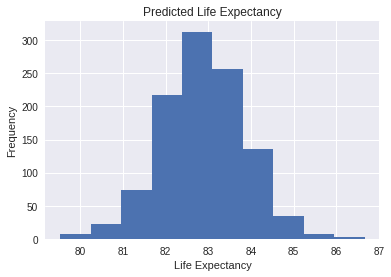

In [42]:
# Plot a histogram of all the predicted life expectancy
plt.hist(lm3.predict(X3))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

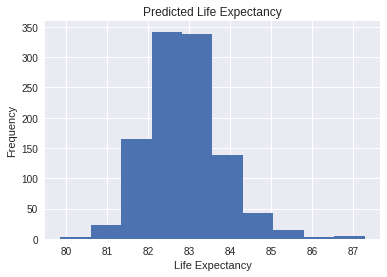

In [43]:
# Plot a histogram of all the predicted life expectancy
plt.hist(lm4.predict(X4))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

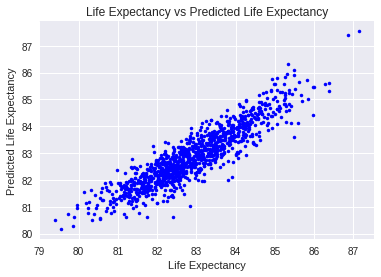

In [44]:
# True prices compared to the predicted life expectancy
plt.plot(y, lm1.predict(X1), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

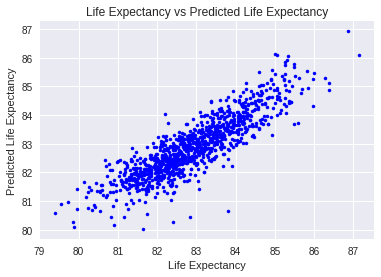

In [45]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, lm2.predict(X2), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

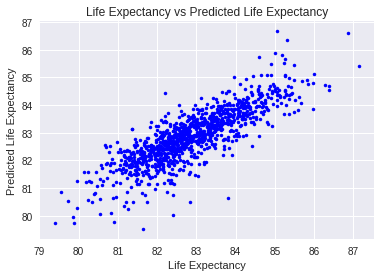

In [46]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, lm3.predict(X3), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

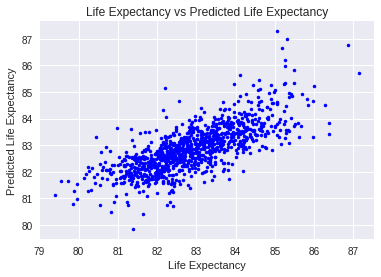

In [47]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, lm4.predict(X4), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

#### Mean squared error (MSE)

In [48]:
print(np.mean((y - lm1.predict(X1)) ** 2))

0.24699801400820467


In [49]:
print(np.mean((y - lm2.predict(X2)) ** 2))

0.3324209353004788


In [50]:
print(np.mean((y - lm3.predict(X3)) ** 2))

0.431050080549629


In [51]:
print(np.mean((y - lm4.predict(X4)) ** 2))

0.6295566100650121


#### 3) Feature Selection with regularization

In [52]:
# Import library
from sklearn.linear_model import Lasso

In [53]:
X0 = X.copy()

In [57]:
# Use default model
las = Lasso()
las.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', las.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.673283151197


In [58]:
# alpha=0.1
las1 = Lasso(alpha=0.1, )
las1.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', las1.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.763203107599


In [63]:
# alpha=0.01
las2 = Lasso(alpha=0.01)
las2.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', las2.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.784650337654


In [64]:
# alpha=0.001
las3 = Lasso(alpha=0.001)
las3.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', las3.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.812676395075


#### Estimated intercept and coefficients

In [75]:
# Lasso with default model
print('Estimated intercept:', las.intercept_)
las_coef = pd.DataFrame(list(zip(X0.columns, las.coef_)), columns = ['features', 'Coefficients'])
lc = las_coef[las_coef['Coefficients']!=0]
print('Number of non-zero coefficients:', len(lc))
lc

Estimated intercept: 82.2201533851
Number of non-zero coefficients: 13


,features,Coefficients
0,cty_pop2000,-5.357781e-08
6,reimb_penroll_adj10,-2.667743e-04
16,mammogram_10,1.316965e-02
17,amb_disch_per1000_10,-7.379059e-04
27,rel_tot,2.997896e-03
28,cs_frac_black,-3.288273e-04
29,cs_frac_hisp,-7.488639e-03
38,pop_density,-1.967099e-05
40,hhinc00,2.587637e-05
41,median_house_value,8.825788e-06


In [76]:
# Lasso with alpha=0.1
print('Estimated intercept:', las1.intercept_)
las1_coef = pd.DataFrame(list(zip(X0.columns, las1.coef_)), columns = ['features', 'Coefficients'])
lc1 = las1_coef[las1_coef['Coefficients']!=0]
print('Number of non-zero coefficients:', len(lc1))
lc1

Estimated intercept: 77.5991722834
Number of non-zero coefficients: 16


,features,Coefficients
0,cty_pop2000,3.699657e-08
5,puninsured2010,-1.177893e-02
6,reimb_penroll_adj10,-1.325384e-04
14,diab_eyeexam_10,1.649221e-02
15,diab_lipids_10,6.518585e-03
16,mammogram_10,2.155932e-02
17,amb_disch_per1000_10,-2.937712e-03
27,rel_tot,3.580896e-03
29,cs_frac_hisp,-1.708457e-02
38,pop_density,-2.435115e-05


In [77]:
# Lasso with alpha=0.01
print('Estimated intercept:', las2.intercept_)
las2_coef = pd.DataFrame(list(zip(X0.columns, las2.coef_)), columns = ['features', 'Coefficients'])
lc2 = las2_coef[las2_coef['Coefficients']!=0]
print('Number of non-zero coefficients:', len(lc2))
lc2

Estimated intercept: 76.3329101161
Number of non-zero coefficients: 26


,features,Coefficients
0,cty_pop2000,2.216409e-08
5,puninsured2010,-5.321097e-03
6,reimb_penroll_adj10,-1.395501e-04
7,mort_30day_hosp_z,-1.213028e-01
12,primcarevis_10,-1.412865e-03
13,diab_hemotest_10,1.363981e-03
14,diab_eyeexam_10,1.990753e-02
15,diab_lipids_10,8.654901e-03
16,mammogram_10,1.848853e-02
17,amb_disch_per1000_10,-2.145574e-03


In [78]:
# Lasso with alpha=0.001
print('Estimated intercept:', las3.intercept_)
las3_coef = pd.DataFrame(list(zip(X0.columns, las3.coef_)), columns = ['features', 'Coefficients'])
lc3 = las3_coef[las3_coef['Coefficients']!=0]
print('Number of non-zero coefficients:', len(lc3))
lc3

Estimated intercept: 78.0900031141
Number of non-zero coefficients: 35


,features,Coefficients
0,cty_pop2000,1.567770e-08
1,intersects_msa,3.549081e-02
2,cur_smoke,-2.377746e+00
5,puninsured2010,-7.261309e-03
6,reimb_penroll_adj10,-1.465169e-04
7,mort_30day_hosp_z,-1.409774e-01
12,primcarevis_10,-2.050766e-03
13,diab_hemotest_10,9.855687e-04
14,diab_eyeexam_10,2.056092e-02
15,diab_lipids_10,7.048587e-03


#### Predict Life Expectancy

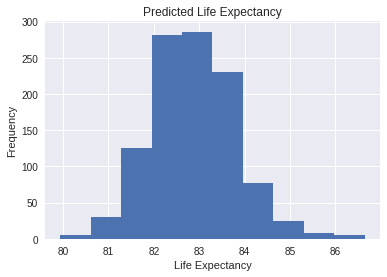

In [79]:
# Plot a histogram of all the predicted life expectancy
plt.hist(las.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

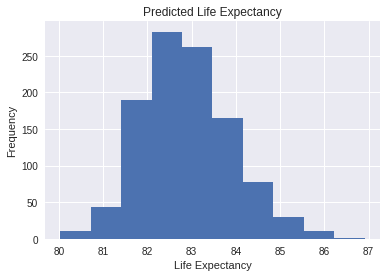

In [80]:
# Plot a histogram of all the predicted life expectancy
plt.hist(las1.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

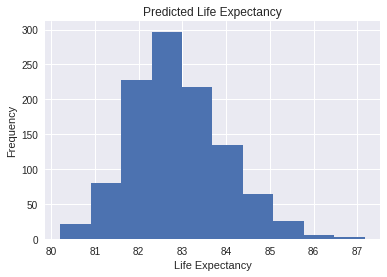

In [81]:
# Plot a histogram of all the predicted life expectancy
plt.hist(las2.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

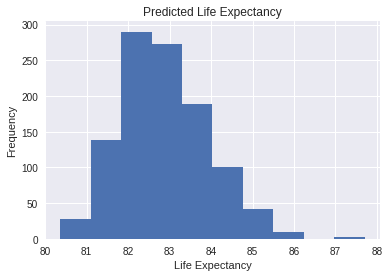

In [82]:
# Plot a histogram of all the predicted life expectancy
plt.hist(las3.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

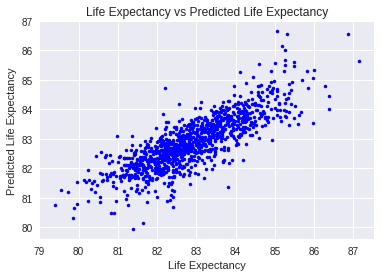

In [84]:
# True prices compared to the predicted life expectancy
plt.plot(y, las.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

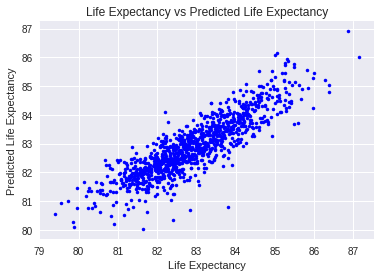

In [85]:
# True prices compared to the predicted life expectancy
plt.plot(y, las1.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

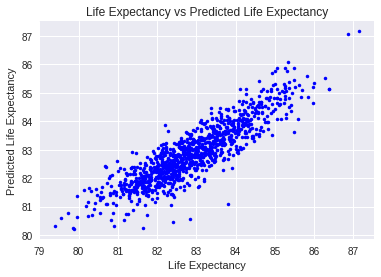

In [86]:
# True prices compared to the predicted life expectancy
plt.plot(y, las2.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

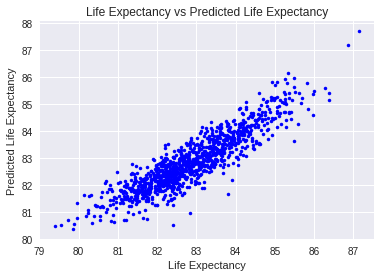

In [87]:
# True prices compared to the predicted life expectancy
plt.plot(y, las3.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

#### Mean squared error (MSE)

In [88]:
print(np.mean((y - las.predict(X0)) ** 2))

0.460792793426228


In [89]:
print(np.mean((y - las1.predict(X0)) ** 2))

0.3339720676301086


In [90]:
print(np.mean((y - las2.predict(X0)) ** 2))

0.3037234621944712


In [91]:
print(np.mean((y - las3.predict(X0)) ** 2))

0.2641962528242538


#### 4) Training and Test Data sets

* Use all features

In [92]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X0, y, test_size=0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(858, 53)
(215, 53)
(858,)
(215,)


In [93]:
# Build a linear regression model using training data sets
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [94]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y_train - pred_train) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.23989782683795785
Fit a model X_train, and calculate MSE with X_test, y_test: 0.29637196828670975


* PCA with n_components=20

In [52]:
# Split dataset
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state = 5)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(858, 10)
(215, 10)
(858,)
(215,)


In [53]:
# Build a linear regression model using training data sets
lm1 = LinearRegression()
lm1.fit(X1_train, y1_train)
pred_train1 = lm1.predict(X1_train)
pred_test1 = lm1.predict(X1_test)

In [54]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y1_train - pred_train1) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y1_test - pred_test1) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.43135675948677205
Fit a model X_train, and calculate MSE with X_test, y_test: 0.44241485234143607


* PCA with n_components=5

In [55]:
# Split dataset
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state = 5)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(858, 5)
(215, 5)
(858,)
(215,)


In [56]:
# Build a linear regression model using training data sets
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)
pred_train2 = lm2.predict(X2_train)
pred_test2 = lm2.predict(X2_test)

In [57]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y2_train - pred_train2) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y2_test - pred_test2) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.6392305603975829
Fit a model X_train, and calculate MSE with X_test, y_test: 0.6044248330593767


* PCA with n_components=3

In [58]:
# Split dataset
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state = 5)
print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(858, 3)
(215, 3)
(858,)
(215,)


In [59]:
# Build a linear regression model using training data sets
lm3 = LinearRegression()
lm3.fit(X3_train, y3_train)
pred_train3 = lm3.predict(X3_train)
pred_test3 = lm3.predict(X3_test)

In [60]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y3_train - pred_train3) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y3_test - pred_test3) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.7918447356814086
Fit a model X_train, and calculate MSE with X_test, y_test: 0.8539001580812011


* PCA with n_components=2

In [61]:
# Split dataset
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state = 5)
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(858, 2)
(215, 2)
(858,)
(215,)


In [62]:
# Build a linear regression model using training data sets
lm4 = LinearRegression()
lm4.fit(X4_train, y4_train)
pred_train4 = lm4.predict(X4_train)
pred_test4 = lm4.predict(X4_test)

In [63]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y4_train - pred_train4) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y4_test - pred_test4) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.8143850689865173
Fit a model X_train, and calculate MSE with X_test, y_test: 0.9356580969583564


##### Residual plots

* PCA with n_components=10

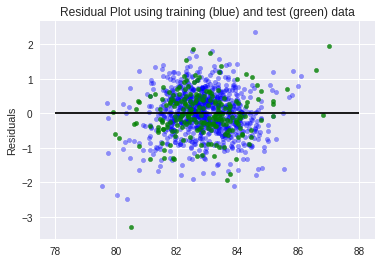

In [64]:
plt.scatter(pred_train1, pred_train1 - y1_train, c='b', s=20, alpha=0.4)
plt.scatter(pred_test1, pred_test1 - y1_test, c='g', s=20, alpha=0.8)
plt.hlines(y = 0, xmin=78, xmax = 88)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

* PCA with n_components=5

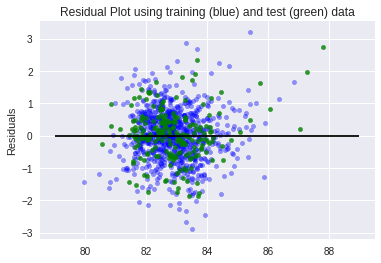

In [65]:
plt.scatter(pred_train2, pred_train2 - y2_train, c='b', s=20, alpha=0.4)
plt.scatter(pred_test2, pred_test2 - y2_test, c='g', s=20, alpha=0.8)
plt.hlines(y = 0, xmin=79, xmax = 89)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

* PCA with n_components=3

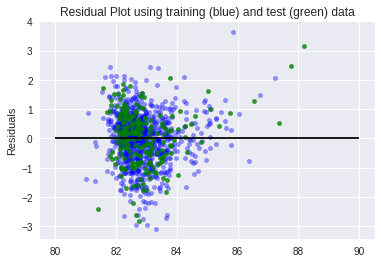

In [66]:
plt.scatter(pred_train3, pred_train3 - y3_train, c='b', s=20, alpha=0.4)
plt.scatter(pred_test3, pred_test3 - y3_test, c='g', s=20, alpha=0.8)
plt.hlines(y = 0, xmin=80, xmax = 90)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

* PCA with n_components=2

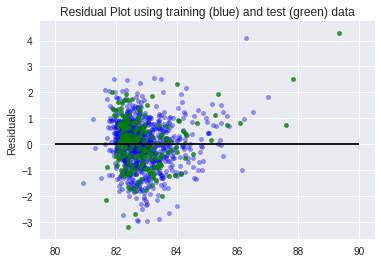

In [67]:
plt.scatter(pred_train4, pred_train4 - y4_train, c='b', s=20, alpha=0.4)
plt.scatter(pred_test4, pred_test4 - y4_test, c='g', s=20, alpha=0.8)
plt.hlines(y = 0, xmin=80, xmax = 90)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

### 2. Support Vector Machines

In [68]:
# Import Library
from sklearn.svm import SVR

#### 1) Use all 53 predictors to fit Support Vector Regression model

In [69]:
X0 = X.copy()

In [70]:
# Support Vector Regression 
svr = SVR()
svr.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', svr.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.78348896526


In [79]:
# RBF model with C=0.5
svr_rbf1 = SVR(kernel='rbf', C=0.5)
svr_rbf1.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', svr_rbf1.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.508880532926


In [80]:
# RBF model with C=0.1
svr_rbf2 = SVR(kernel='rbf', C=0.1)
svr_rbf2.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', svr_rbf2.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.119554155052


In [72]:
# Polynomial model with C=0.1
#svr_poly = SVR(kernel='poly', C=0.1)
#svr_poly.fit(X0, y)
#print('Coefficient of determination R^2 of the prediction:', svr_poly.score(X0, y))

In [81]:
# RBF model with C=0.01
svr_rbf3 = SVR(kernel='rbf', C=0.01)
svr_rbf3.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', svr_rbf3.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.00429124413604


In [ ]:
# Polynomial model with C=0.01
#svr_poly = SVR(kernel='poly', C=0.01)
#svr_poly.fit(X0, y)
#print('Coefficient of determination R^2 of the prediction:', svr_poly.score(X0, y))

#### Predict Life Expectancy

Default model

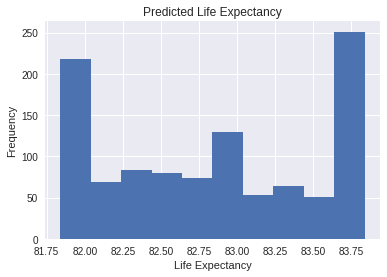

In [77]:
# Plot a histogram of all the predicted life expectancy
plt.hist(svr.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

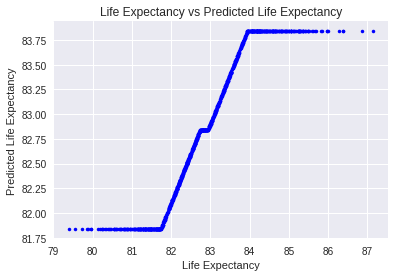

In [78]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, svr.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

RBF model with C=0.5

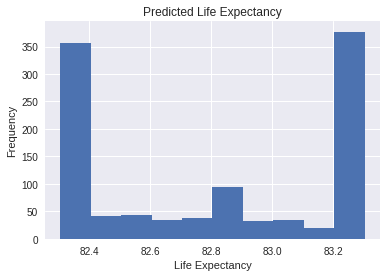

In [82]:
# Plot a histogram of all the predicted life expectancy
plt.hist(svr_rbf1.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

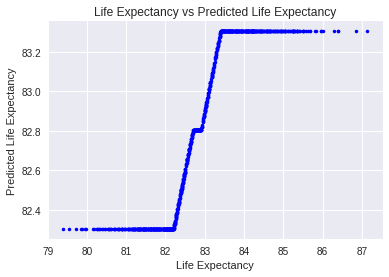

In [83]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, svr_rbf1.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

RBF model with C=0.1

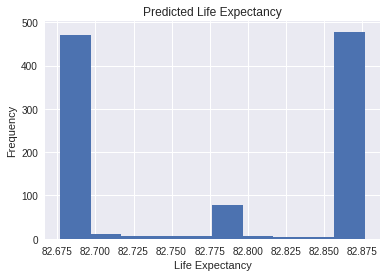

In [84]:
# Plot a histogram of all the predicted life expectancy
plt.hist(svr_rbf2.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

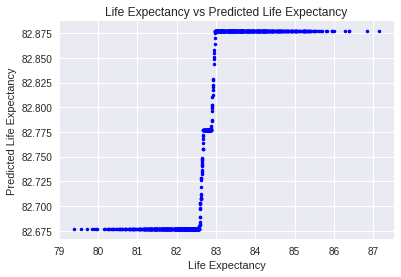

In [85]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, svr_rbf2.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

RBF model with C=0.01

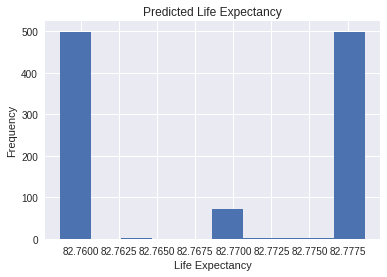

In [86]:
# Plot a histogram of all the predicted life expectancy
plt.hist(svr_rbf3.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

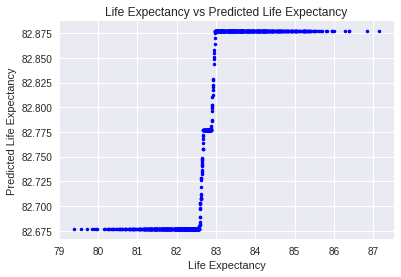

In [87]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, svr_rbf2.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

##### Residual sum of squares

In [88]:
print(np.sum((y - svr.predict(X0)) ** 2))

327.6528155389526


In [89]:
print(np.sum((y - svr_rbf1.predict(X0)) ** 2))

743.2262117551106


In [90]:
print(np.sum((y - svr_rbf2.predict(X0)) ** 2))

1332.4058072769253


In [91]:
print(np.sum((y - svr_rbf3.predict(X0)) ** 2))

1506.8367194674017


##### Mean squared error

In [92]:
print(np.mean((y - svr.predict(X0)) ** 2))

0.3053614310707853


In [93]:
print(np.mean((y - svr_rbf1.predict(X0)) ** 2))

0.6926618935275961


In [94]:
print(np.mean((y - svr_rbf2.predict(X0)) ** 2))

1.2417575091117663


In [95]:
print(np.mean((y - svr_rbf3.predict(X0)) ** 2))

1.4043212669780072


#### 2) Feature selection

In [97]:
# PCA with n_components=10
svr1 = SVR(C=0.5)
svr1.fit(X1, y)
print('Coefficient of determination R^2 of the prediction:', svr1.score(X1, y))

Coefficient of determination R^2 of the prediction: 0.508880532926


In [99]:
# PCA with n_components=5
svr2 = SVR(C=0.5)
svr2.fit(X2, y)
print('Coefficient of determination R^2 of the prediction:', svr2.score(X2, y))

Coefficient of determination R^2 of the prediction: 0.508880532926


In [100]:
# PCA with n_components=3
svr3 = SVR(C=0.5)
svr3.fit(X3, y)
print('Coefficient of determination R^2 of the prediction:', svr3.score(X3, y))

Coefficient of determination R^2 of the prediction: 0.508880532926


In [101]:
# PCA with n_components=2
svr4 = SVR(C=0.5)
svr4.fit(X4, y)
print('Coefficient of determination R^2 of the prediction:', svr4.score(X4, y))

Coefficient of determination R^2 of the prediction: 0.508880532926


#### Predict Life Expectancy

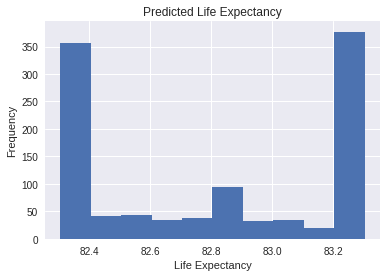

In [102]:
# Plot a histogram of all the predicted life expectancy
plt.hist(svr1.predict(X1))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

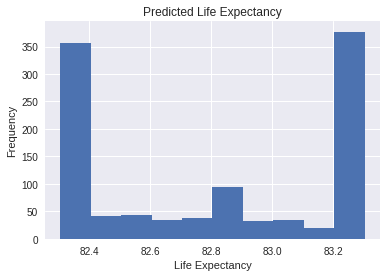

In [103]:
# Plot a histogram of all the predicted life expectancy
plt.hist(svr2.predict(X2))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

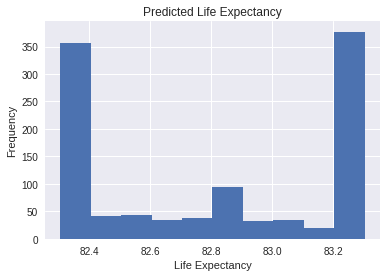

In [104]:
# Plot a histogram of all the predicted life expectancy
plt.hist(svr3.predict(X3))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

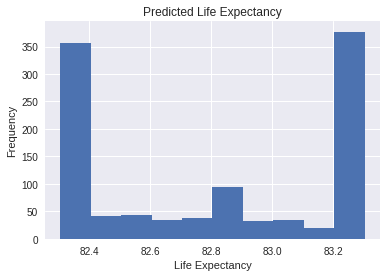

In [105]:
# Plot a histogram of all the predicted life expectancy
plt.hist(svr4.predict(X4))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

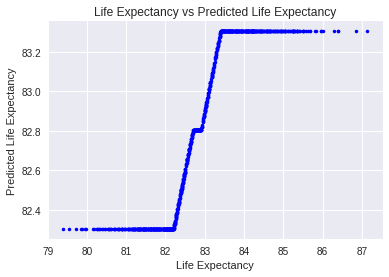

In [106]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, svr1.predict(X1), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

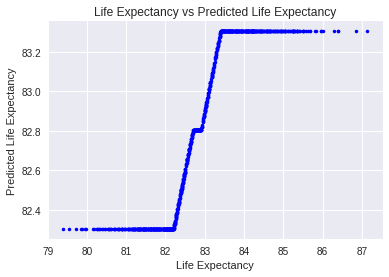

In [107]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, svr2.predict(X2), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

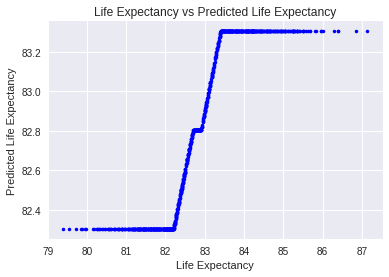

In [108]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, svr3.predict(X3), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

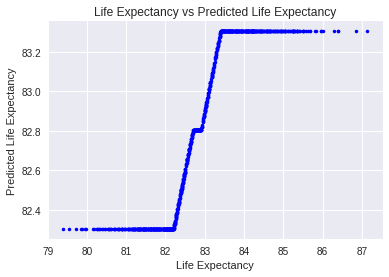

In [109]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, svr4.predict(X4), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

##### Residual sum of squares

In [110]:
print(np.sum((y - svr1.predict(X1)) ** 2))

743.2262117551106


In [111]:
print(np.sum((y - svr2.predict(X2)) ** 2))

743.2262117551106


In [112]:
print(np.sum((y - svr3.predict(X3)) ** 2))

743.2262117551106


In [113]:
print(np.sum((y - svr4.predict(X4)) ** 2))

743.2262117551106


##### Mean squared error

In [114]:
print(np.mean((y - svr1.predict(X1)) ** 2))

0.6926618935275961


In [115]:
print(np.mean((y - svr2.predict(X2)) ** 2))

0.6926618935275961


In [116]:
print(np.mean((y - svr3.predict(X3)) ** 2))

0.6926618935275961


In [117]:
print(np.mean((y - svr4.predict(X4)) ** 2))

0.6926618935275961


#### 3) Training and Test Data sets

Original dataset with Default SVR model 

In [118]:
X0 = X.copy()

In [119]:
# Split dataset
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y, test_size=0.2, random_state = 5)
print(X0_train.shape)
print(X0_test.shape)
print(y0_train.shape)
print(y0_test.shape)

(858, 53)
(215, 53)
(858,)
(215,)


In [122]:
# Build a support vector regression model using training data sets
svr = SVR()
svr.fit(X0_train, y0_train)
pred_train0 = svr.predict(X0_train)
pred_test0 = svr.predict(X0_test)

In [123]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y0_train - pred_train0) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y0_test - pred_test0) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.3056692394741886
Fit a model X_train, and calculate MSE with X_test, y_test: 1.4713715795892517


PCA with n_components=10 and SVR with C=0.5

In [124]:
# Split dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state = 5)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(858, 10)
(215, 10)
(858,)
(215,)


In [126]:
# Build a support vector regression model using training data sets
svr1 = SVR(C=0.5)
svr1.fit(X1_train, y1_train)
pred_train1 = svr1.predict(X1_train)
pred_test1 = svr1.predict(X1_test)

In [127]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y1_train - pred_train1) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y1_test - pred_test1) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.6891693073327819
Fit a model X_train, and calculate MSE with X_test, y_test: 1.4738157392890738


PCA with n_components=5 and SVR with C=0.5

In [128]:
# Split dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state = 5)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(858, 5)
(215, 5)
(858,)
(215,)


In [129]:
# Build a support vector regression model using training data sets
svr2 = SVR(C=0.5)
svr2.fit(X2_train, y2_train)
pred_train2 = svr2.predict(X2_train)
pred_test2 = svr2.predict(X2_test)

In [130]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y2_train - pred_train2) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y2_test - pred_test2) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.6891693073327819
Fit a model X_train, and calculate MSE with X_test, y_test: 1.4738157392890738


PCA with n_components=3 and SVR with C=0.1

In [131]:
# Split dataset
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state = 5)
print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(858, 3)
(215, 3)
(858,)
(215,)


In [132]:
# Build a support vector regression model using training data sets
svr3 = SVR(C=0.1)
svr3.fit(X3_train, y3_train)
pred_train3 = svr3.predict(X3_train)
pred_test3 = svr3.predict(X3_test)

In [133]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y3_train - pred_train3) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y3_test - pred_test3) ** 2))

Fit a model X_train, and calculate MSE with y_train: 1.2304353715220717
Fit a model X_train, and calculate MSE with X_test, y_test: 1.477138331386946


PCA with n_components=2 and SVR with C=0.01

In [134]:
# Split dataset
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state = 5)
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(858, 2)
(215, 2)
(858,)
(215,)


In [135]:
# Build a support vector regression model using training data sets
svr4 = SVR(C=0.01)
svr4.fit(X4_train, y4_train)
pred_train4 = svr4.predict(X4_train)
pred_test4 = svr4.predict(X4_test)

In [136]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y4_train - pred_train4) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y4_test - pred_test4) ** 2))

Fit a model X_train, and calculate MSE with y_train: 1.390234195425816
Fit a model X_train, and calculate MSE with X_test, y_test: 1.4780347186738856


??? Which model is the best?

### 3. Random Forests

In [137]:
# Import Library
from sklearn.ensemble import RandomForestRegressor

#### 1) Use default Random Forest Regression model

In [138]:
X0 = X.copy()

In [139]:
# Random Forest Regression 
rfr = RandomForestRegressor()
rfr.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', rfr.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.953509853776


#### Feature Importances

In [146]:
fi = pd.DataFrame(list(zip(X0.columns, rfr.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False)

,features,Importance
41,median_house_value,0.293127
11,med_prev_qual_z,0.104987
2,cur_smoke,0.099060
5,puninsured2010,0.082825
46,cs_educ_ba,0.068517
47,e_rank_b,0.045393
6,reimb_penroll_adj10,0.032155
3,bmi_obese,0.024820
28,cs_frac_black,0.014653
42,ccd_exp_tot,0.014097


We can see that the most important features are: median_house_value, med_prev_qual_z, cur_smoke, puninsured2010, cs_educ_ba  
They are: Median House Value, Mean of Z-Scores for Dartmouth Atlas Ambulatory Care Measures, Fraction Current Smokers, Percent Uninsured, Percent College Grads    

#### Predict Life Expectancy

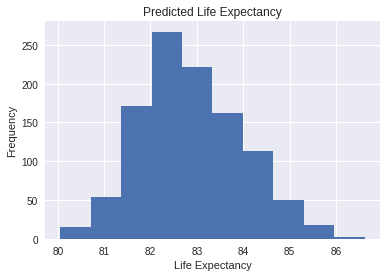

In [165]:
# Plot a histogram of all the predicted life expectancy
plt.hist(rfr.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

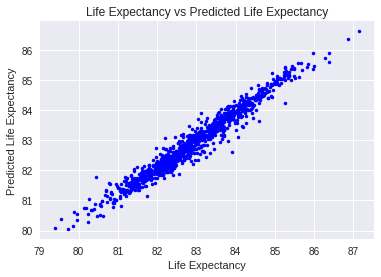

In [166]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, rfr.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

##### Residual sum of squares

In [167]:
print(np.sum((y - rfr.predict(X0)) ** 2))

70.35496977577709


##### Mean squared error

In [168]:
print(np.mean((y - rfr.predict(X0)) ** 2))

0.06556847136605508


#### 2) Tuning the parameters of Random Forest model

In [160]:
# max_features = 20
rfr1 = RandomForestRegressor(max_features=20)
rfr1.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', rfr1.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.948779276351


In [155]:
# max_features = 10
rfr2 = RandomForestRegressor(max_features=10)
rfr2.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', rfr2.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.953426981443


In [156]:
# max_features = 5
rfr3 = RandomForestRegressor(max_features=5)
rfr3.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', rfr3.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.94558935417


In [158]:
# n_estimators = 20
rfr4 = RandomForestRegressor(n_estimators=20)
rfr4.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', rfr4.score(X0, y))

Coefficient of determination R^2 of the prediction: 0.959725498693


In [163]:
# n_estimators = 100
rfr5 = RandomForestRegressor(n_estimators=100, oob_score=True)
rfr5.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', rfr5.score(X0, y))
print('Score of the training dataset obtained using an out-of-bag estimate:', rfr5.oob_score_ )

Coefficient of determination R^2 of the prediction: 0.968790463687
Score of the training dataset obtained using an out-of-bag estimate: 0.767981395314


In [164]:
# n_estimators = 200
rfr6 = RandomForestRegressor(n_estimators=200, oob_score=True, random_state=50)
rfr6.fit(X0, y)
print('Coefficient of determination R^2 of the prediction:', rfr6.score(X0, y))
print('Score of the training dataset obtained using an out-of-bag estimate:', rfr6.oob_score_ )

Coefficient of determination R^2 of the prediction: 0.969217709786
Score of the training dataset obtained using an out-of-bag estimate: 0.76942537031


#### Feature Importances

In [169]:
fi1 = pd.DataFrame(list(zip(X0.columns, rfr1.feature_importances_)), columns = ['features', 'Importance'])
fi1.sort_values(by='Importance', ascending=False).head(10)

,features,Importance
41,median_house_value,0.195655
11,med_prev_qual_z,0.070143
46,cs_educ_ba,0.065743
5,puninsured2010,0.065479
17,amb_disch_per1000_10,0.064105
16,mammogram_10,0.057212
2,cur_smoke,0.051195
3,bmi_obese,0.043582
14,diab_eyeexam_10,0.042654
6,reimb_penroll_adj10,0.040524


In [170]:
fi2 = pd.DataFrame(list(zip(X0.columns, rfr2.feature_importances_)), columns = ['features', 'Importance'])
fi2.sort_values(by='Importance', ascending=False).head(10)

,features,Importance
41,median_house_value,0.179739
11,med_prev_qual_z,0.166517
6,reimb_penroll_adj10,0.062730
2,cur_smoke,0.047455
46,cs_educ_ba,0.044670
5,puninsured2010,0.034695
23,poor_share,0.031083
3,bmi_obese,0.029680
47,e_rank_b,0.025071
16,mammogram_10,0.021501


In [171]:
fi3 = pd.DataFrame(list(zip(X0.columns, rfr3.feature_importances_)), columns = ['features', 'Importance'])
fi3.sort_values(by='Importance', ascending=False).head(10)

,features,Importance
41,median_house_value,0.122470
46,cs_educ_ba,0.076231
5,puninsured2010,0.072707
11,med_prev_qual_z,0.072282
40,hhinc00,0.058439
14,diab_eyeexam_10,0.054882
3,bmi_obese,0.053271
2,cur_smoke,0.045934
33,cs_labforce,0.042351
13,diab_hemotest_10,0.037151


In [172]:
fi4 = pd.DataFrame(list(zip(X0.columns, rfr4.feature_importances_)), columns = ['features', 'Importance'])
fi4.sort_values(by='Importance', ascending=False).head(10)

,features,Importance
41,median_house_value,0.297033
11,med_prev_qual_z,0.122609
2,cur_smoke,0.112613
5,puninsured2010,0.068298
46,cs_educ_ba,0.039870
47,e_rank_b,0.038203
3,bmi_obese,0.037915
6,reimb_penroll_adj10,0.036914
16,mammogram_10,0.018970
48,cs_fam_wkidsinglemom,0.014555


In [173]:
fi5 = pd.DataFrame(list(zip(X0.columns, rfr5.feature_importances_)), columns = ['features', 'Importance'])
fi5.sort_values(by='Importance', ascending=False).head(10)

,features,Importance
41,median_house_value,0.222427
11,med_prev_qual_z,0.145816
2,cur_smoke,0.096210
46,cs_educ_ba,0.081780
5,puninsured2010,0.062447
6,reimb_penroll_adj10,0.041153
47,e_rank_b,0.039149
3,bmi_obese,0.039069
16,mammogram_10,0.022030
17,amb_disch_per1000_10,0.020039


In [174]:
fi6 = pd.DataFrame(list(zip(X0.columns, rfr6.feature_importances_)), columns = ['features', 'Importance'])
fi6.sort_values(by='Importance', ascending=False).head(10)

,features,Importance
41,median_house_value,0.244180
11,med_prev_qual_z,0.131244
2,cur_smoke,0.098932
46,cs_educ_ba,0.076523
5,puninsured2010,0.074873
47,e_rank_b,0.037186
6,reimb_penroll_adj10,0.035520
3,bmi_obese,0.035098
16,mammogram_10,0.024484
17,amb_disch_per1000_10,0.019673


For different model, the most important features are slightly different.

#### Predict Life Expectancy

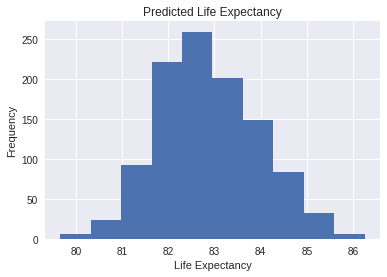

In [175]:
# Plot a histogram of all the predicted life expectancy
plt.hist(rfr1.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

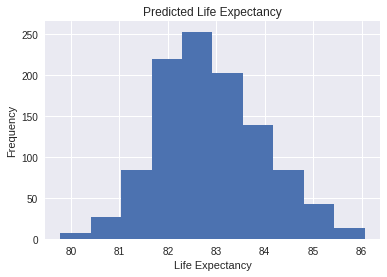

In [176]:
# Plot a histogram of all the predicted life expectancy
plt.hist(rfr2.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

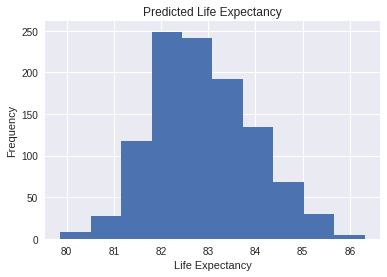

In [177]:
# Plot a histogram of all the predicted life expectancy
plt.hist(rfr3.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

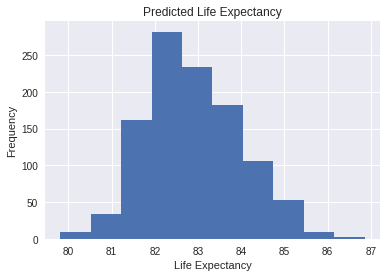

In [178]:
# Plot a histogram of all the predicted life expectancy
plt.hist(rfr4.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

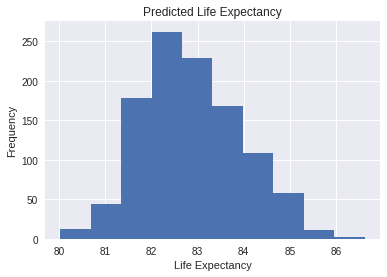

In [179]:
# Plot a histogram of all the predicted life expectancy
plt.hist(rfr5.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

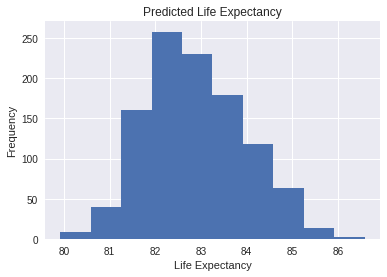

In [180]:
# Plot a histogram of all the predicted life expectancy
plt.hist(rfr6.predict(X0))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

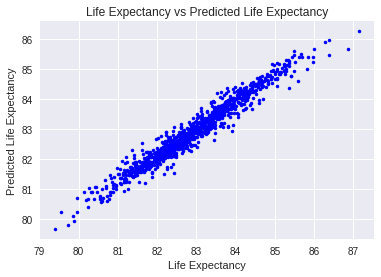

In [181]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, rfr1.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

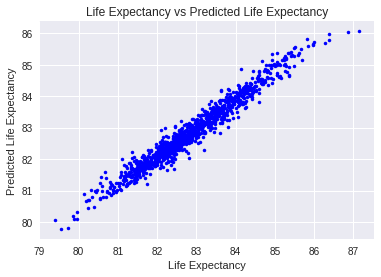

In [182]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, rfr2.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

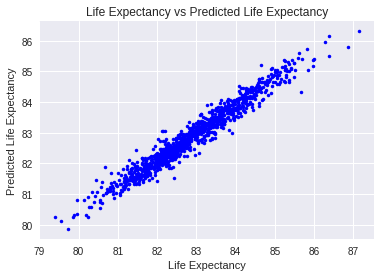

In [183]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, rfr3.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

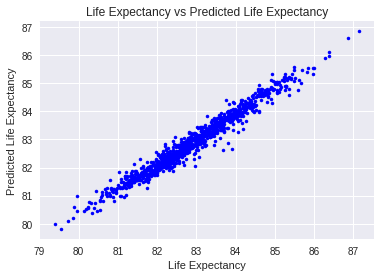

In [184]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, rfr4.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

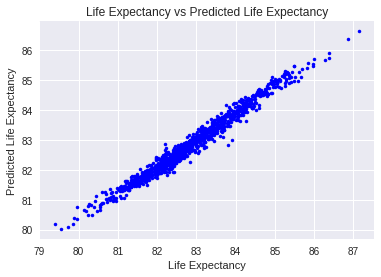

In [185]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, rfr5.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

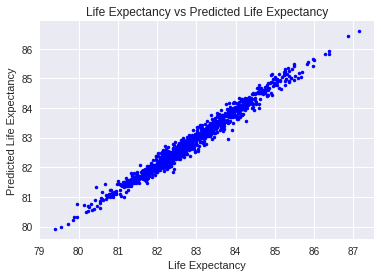

In [186]:
# True life expectancy compared to the predicted life expectancy
plt.plot(y, rfr6.predict(X0), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

##### Residual sum of squares

In [187]:
print(np.sum((y - rfr1.predict(X0)) ** 2))

77.51389825357724


In [188]:
print(np.sum((y - rfr2.predict(X0)) ** 2))

70.48038302872335


In [189]:
print(np.sum((y - rfr3.predict(X0)) ** 2))

82.34130571225803


In [190]:
print(np.sum((y - rfr4.predict(X0)) ** 2))

60.948642934815574


In [191]:
print(np.sum((y - rfr5.predict(X0)) ** 2))

47.230352286062846


In [192]:
print(np.sum((y - rfr6.predict(X0)) ** 2))

46.583787608585126


##### Mean squared error

In [193]:
print(np.mean((y - rfr1.predict(X0)) ** 2))

0.07224035251964328


In [194]:
print(np.mean((y - rfr2.predict(X0)) ** 2))

0.065685352310087


In [195]:
print(np.mean((y - rfr3.predict(X0)) ** 2))

0.07673933430778941


In [196]:
print(np.mean((y - rfr4.predict(X0)) ** 2))

0.05680209033999588


In [197]:
print(np.mean((y - rfr5.predict(X0)) ** 2))

0.04401710371487684


In [198]:
print(np.mean((y - rfr6.predict(X0)) ** 2))

0.043414527128224724


By MSE value, rfr6 is the best model.

#### 3) Training and Test Data sets

In [199]:
X0 = X.copy()

In [200]:
# Split dataset
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y, test_size=0.2, random_state = 5)
print(X0_train.shape)
print(X0_test.shape)
print(y0_train.shape)
print(y0_test.shape)

(858, 53)
(215, 53)
(858,)
(215,)


In [201]:
# Build a random forest regressor using training data sets
rfr = RandomForestRegressor()
rfr.fit(X0_train, y0_train)
pred_train0 = rfr.predict(X0_train)
pred_test0 = rfr.predict(X0_test)

In [202]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y0_train - pred_train0) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y0_test - pred_test0) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.0645263668474103
Fit a model X_train, and calculate MSE with X_test, y_test: 0.4190035069236205


In [203]:
# max_features = 20
X1_train, X1_test, y1_train, y1_test = train_test_split(X0, y, test_size=0.2, random_state = 5)
rfr1 = RandomForestRegressor(max_features=20)
rfr1.fit(X1_train, y1_train)
pred_train1 = rfr1.predict(X1_train)
pred_test1 = rfr1.predict(X1_test)

In [204]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y1_train - pred_train1) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y1_test - pred_test1) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.06680999432076755
Fit a model X_train, and calculate MSE with X_test, y_test: 0.44088749570099167


In [205]:
# max_features = 10
X2_train, X2_test, y2_train, y2_test = train_test_split(X0, y, test_size=0.2, random_state = 5)
rfr2 = RandomForestRegressor(max_features=10)
rfr2.fit(X2_train, y2_train)
pred_train2 = rfr2.predict(X2_train)
pred_test2 = rfr2.predict(X2_test)

In [206]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y2_train - pred_train2) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y2_test - pred_test2) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.06704543816539807
Fit a model X_train, and calculate MSE with X_test, y_test: 0.3998816290490083


In [207]:
# max_features = 5
X3_train, X3_test, y3_train, y3_test = train_test_split(X0, y, test_size=0.2, random_state = 5)
rfr3 = RandomForestRegressor(max_features=5)
rfr3.fit(X3_train, y3_train)
pred_train3 = rfr3.predict(X3_train)
pred_test3 = rfr3.predict(X3_test)

In [208]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y3_train - pred_train3) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y3_test - pred_test3) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.07835142548576228
Fit a model X_train, and calculate MSE with X_test, y_test: 0.44196054325595957


In [209]:
# n_estimators = 20
X4_train, X4_test, y4_train, y4_test = train_test_split(X0, y, test_size=0.2, random_state = 5)
rfr4 = RandomForestRegressor(n_estimators=20)
rfr4.fit(X4_train, y4_train)
pred_train4 = rfr4.predict(X4_train)
pred_test4 = rfr4.predict(X4_test)

In [210]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y4_train - pred_train4) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y4_test - pred_test4) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.054930735898652265
Fit a model X_train, and calculate MSE with X_test, y_test: 0.3906286638919231


In [211]:
# n_estimators = 100
X5_train, X5_test, y5_train, y5_test = train_test_split(X0, y, test_size=0.2, random_state = 5)
rfr5 = RandomForestRegressor(n_estimators=100, oob_score=True)
rfr5.fit(X5_train, y5_train)
pred_train5 = rfr5.predict(X5_train)
pred_test5 = rfr5.predict(X5_test)

In [212]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y5_train - pred_train5) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y5_test - pred_test5) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.045851851282456224
Fit a model X_train, and calculate MSE with X_test, y_test: 0.38038429234873183


In [213]:
# n_estimators = 200
X6_train, X6_test, y6_train, y6_test = train_test_split(X0, y, test_size=0.2, random_state = 5)
rfr6 = RandomForestRegressor(n_estimators=200, oob_score=True, random_state=50)
rfr6.fit(X6_train, y6_train)
pred_train6 = rfr6.predict(X6_train)
pred_test6 = rfr6.predict(X6_test)

In [214]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y6_train - pred_train6) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y6_test - pred_test6) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.04409899619449811
Fit a model X_train, and calculate MSE with X_test, y_test: 0.36231187154021777
